In [1]:
import requests
from bs4 import BeautifulSoup


In [2]:
url="https://web.archive.org/web/20161022120719/http://www.nga.gov/collection/anB1.htm"
page=requests.get(url)


In [4]:
data = BeautifulSoup(page.text,'html.parser')


In [ ]:
print(data.prettify)


In [ ]:
artist_list = data.find('div',attrs={'class':'BodyText'})


In [100]:
 print(artist_list.prettify())


<div class="BodyText">
 <!-- InstanceBeginEditable name="BodyText" -->
 <h3>
  Artist names beginning with B
 </h3>
 <table>
  <tr valign="top">
   <td>
    <a href="/web/20161022120719/http://www.nga.gov/cgi-bin/tsearch?artistid=38916">
     Baagöe, Carl Emil
    </a>
   </td>
   <td>
    Danish, 1829 - 1902
   </td>
  </tr>
  <tr valign="top">
   <td>
    <a href="/web/20161022120719/http://www.nga.gov/cgi-bin/tsearch?artistid=41463">
     Baak, Jehsong
    </a>
   </td>
   <td>
    American, born South Korea, 1967
   </td>
  </tr>
  <tr valign="top">
   <td>
    <a href="/web/20161022120719/http://www.nga.gov/cgi-bin/tsearch?artistid=32727">
     Babbitt, Platt D.
    </a>
   </td>
   <td>
    American, died 1879
   </td>
  </tr>
  <tr valign="top">
   <td>
    <a href="/web/20161022120719/http://www.nga.gov/cgi-bin/tsearch?artistid=28284">
     Babcock, William Perkins
    </a>
   </td>
   <td>
    American, 1826 - 1899
   </td>
  </tr>
  <tr valign="top">
   <td>
    <a href="/web

In [103]:
artist_list.a.text

'Baagöe, Carl Emil'

In [104]:
artist_list.a['href']

'/web/20161022120719/http://www.nga.gov/cgi-bin/tsearch?artistid=38916'

In [102]:
artist_names=[]
artist_link=[]
for name in artist_list.findAll('a'):
    artistnames = name.text
    artist_names.append(artistnames)
    artistlink='https://web.archive.org'+name['href']
    artist_link.append(artistlink)


    

In [20]:
import pandas as pd

In [21]:
import pandas as pd
data = {'artist_names':artist_names,'artist_link':artist_link}
data= pd.DataFrame(data)
data.head()


,artist_names,artist_link
0,"Baagöe, Carl Emil",https://web.archive.org/web/20161022120719/htt...
1,"Baak, Jehsong",https://web.archive.org/web/20161022120719/htt...
2,"Babbitt, Platt D.",https://web.archive.org/web/20161022120719/htt...
3,"Babcock, William Perkins",https://web.archive.org/web/20161022120719/htt...
4,"Babel, Pierre-Edme",https://web.archive.org/web/20161022120719/htt...


In [30]:
##### Capture Another website

In [43]:
url = 'https://pokemondb.net/pokedex/all'
pokeman_data = requests.get(url)
data = BeautifulSoup(pokeman_data.content,'html.parser')
data_table = data.find('table')
data_table

rows = data_table.find_all('tr')
for col in rows:
    col=col.find_all('td')
    row =[i.text for i in col]
    print(row)



[]
['001', 'Bulbasaur', 'Grass Poison', '318', '45', '49', '49', '65', '65', '45']
['002', 'Ivysaur', 'Grass Poison', '405', '60', '62', '63', '80', '80', '60']
['003', 'Venusaur', 'Grass Poison', '525', '80', '82', '83', '100', '100', '80']
['003', 'Venusaur Mega Venusaur', 'Grass Poison', '625', '80', '100', '123', '122', '120', '80']
['004', 'Charmander', 'Fire ', '309', '39', '52', '43', '60', '50', '65']
['005', 'Charmeleon', 'Fire ', '405', '58', '64', '58', '80', '65', '80']
['006', 'Charizard', 'Fire Flying', '534', '78', '84', '78', '109', '85', '100']
['006', 'Charizard Mega Charizard X', 'Fire Dragon', '634', '78', '130', '111', '130', '85', '100']
['006', 'Charizard Mega Charizard Y', 'Fire Flying', '634', '78', '104', '78', '159', '115', '100']
['007', 'Squirtle', 'Water ', '314', '44', '48', '65', '50', '64', '43']
['008', 'Wartortle', 'Water ', '405', '59', '63', '80', '65', '80', '58']
['009', 'Blastoise', 'Water ', '530', '79', '83', '100', '85', '105', '78']
['009', '

In [44]:
data = []
for row in rows:
    td = row.find_all('td')
    row1=[i.text.strip() for i in td]
    data.append(row1)
pokemon_data = pd.DataFrame(data)


In [32]:
pokemon_data

,0,1,2,3,4,5,6,7,8,9
0,None,None,None,None,None,None,None,None,None,None
1,001,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
2,002,Ivysaur,Grass Poison,405,60,62,63,80,80,60
3,003,Venusaur,Grass Poison,525,80,82,83,100,100,80
4,003,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80
...,...,...,...,...,...,...,...,...,...,...
1030,890,Eternatus Eternamax,Poison Dragon,1125,255,115,250,125,250,130
1031,891,Kubfu,Fighting,385,60,90,60,53,50,72
1032,892,Urshifu Single Strike Style,Fighting Dark,550,100,130,100,63,60,97
1033,892,Urshifu Rapid Strike Style,Fighting Water,550,100,130,100,63,60,97


In [36]:
pokemon_data=pokemon_data[1:]
pokemon_data.head()

,0,1,2,3,4,5,6,7,8,9
1,001,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
2,002,Ivysaur,Grass Poison,405,60,62,63,80,80,60
3,003,Venusaur,Grass Poison,525,80,82,83,100,100,80
4,003,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80
5,004,Charmander,Fire,309,39,52,43,60,50,65


In [40]:
pokemon_data.shape

(1034, 10)

In [45]:
pokemon_data.rename(columns ={0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J'},
                   inplace=True)


In [42]:
pokemon_data.drop(['A'],axis=1,inplace=True)
pokemon_data.head()


C:\Users\jay\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,B,C,D,E,F,G,H,I,J
1,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
2,Ivysaur,Grass Poison,405,60,62,63,80,80,60
3,Venusaur,Grass Poison,525,80,82,83,100,100,80
4,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80
5,Charmander,Fire,309,39,52,43,60,50,65


In [71]:
names = pokemon_data.C.str.split(expand=True)
data = pd.concat([pokemon_data,names],axis=1)
data.drop(['C'],axis=1,inplace=True)
data.rename(columns ={'B':'Name',0:'Type1',1:'Type2','D':'Total','E':'HP','F':'Attack',
                      'G':'Defence','H':'Sp Attack','I':'Sp Defeence','J':'Speed'},
                   inplace=True)


In [72]:
data

,Name,Total,HP,Attack,Defence,Sp Attack,Sp Defeence,Speed,Type1,Type2
1,Bulbasaur,318,45,49,49,65,65,45,Grass,Poison
2,Ivysaur,405,60,62,63,80,80,60,Grass,Poison
3,Venusaur,525,80,82,83,100,100,80,Grass,Poison
4,Venusaur Mega Venusaur,625,80,100,123,122,120,80,Grass,Poison
5,Charmander,309,39,52,43,60,50,65,Fire,None
...,...,...,...,...,...,...,...,...,...,...
1030,Eternatus Eternamax,1125,255,115,250,125,250,130,Poison,Dragon
1031,Kubfu,385,60,90,60,53,50,72,Fighting,None
1032,Urshifu Single Strike Style,550,100,130,100,63,60,97,Fighting,Dark
1033,Urshifu Rapid Strike Style,550,100,130,100,63,60,97,Fighting,Water


In [73]:
data.head()

,Name,Total,HP,Attack,Defence,Sp Attack,Sp Defeence,Speed,Type1,Type2
1,Bulbasaur,318,45,49,49,65,65,45,Grass,Poison
2,Ivysaur,405,60,62,63,80,80,60,Grass,Poison
3,Venusaur,525,80,82,83,100,100,80,Grass,Poison
4,Venusaur Mega Venusaur,625,80,100,123,122,120,80,Grass,Poison
5,Charmander,309,39,52,43,60,50,65,Fire,None


In [74]:
import seaborn as sn


In [75]:
data.dtypes

Name           object
Total          object
HP             object
Attack         object
Defence        object
Sp Attack      object
Sp Defeence    object
Speed          object
Type1          object
Type2          object
dtype: object

In [76]:
data['Total']=data['Total'].astype(str).astype(int)
data['Defence']=data['Defence'].astype(str).astype(int)
data['Sp Attack']=data['Sp Attack'].astype(str).astype(int)
data['Sp Defeence']=data['Sp Defeence'].astype(str).astype(int)
data['Speed']=data['Speed'].astype(str).astype(int)
data['HP']=data['HP'].astype(str).astype(int)
data['Attack']=data['Attack'].astype(str).astype(int)

In [77]:
data.dtypes

Name           object
Total           int32
HP              int32
Attack          int32
Defence         int32
Sp Attack       int32
Sp Defeence     int32
Speed           int32
Type1          object
Type2          object
dtype: object

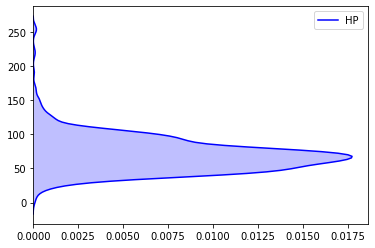

In [83]:
sn.kdeplot(data['HP'],shade=True,vertical=True,color='blue')

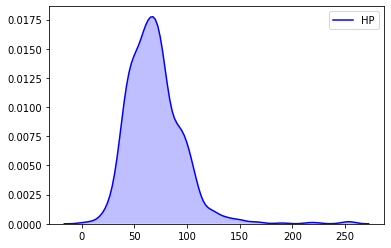

In [84]:
sn.kdeplot(data['HP'],shade=True,color='blue')

In [85]:
data.columns


Index(['Name', 'Total', 'HP', 'Attack', 'Defence', 'Sp Attack', 'Sp Defeence',
       'Speed', 'Type1', 'Type2'],
      dtype='object')

<Figure size 864x576 with 0 Axes>

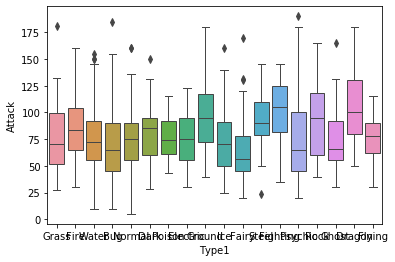

<Figure size 864x576 with 0 Axes>

In [98]:
import matplotlib.pyplot as plt
sn.boxplot(x='Type1',y='Attack',data=data,linewidth=1)
plt.figure(figsize=(12,8))